## 3D construction - trial executions

This notebook is used for trial executions before including in the main notebook. Some of its contents include boundary box calculation and car visualization using open3d and plotly.

In [ ]:
!pip install open3d

In [ ]:
!pip install -q plotly==4.2.1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import open3d as o3d

In [ ]:
# for .h5, .ply plot
def create_df(file_nm):
    return pd.read_csv(file_nm, sep=";", header=None)
# plot
def create_img(df):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[0], df[1], df[2], c='skyblue', s=60)
    ax.view_init(30, 185)
    plt.show()

def create_img(arr):
    df = pd.DataFrame(arr)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[0], df[1], df[2], c='skyblue', s=60)
    ax.view_init(30, 185)
    plt.show()



car.txt
              0         1         2
0      0.286645 -0.065540 -0.070317
1     -0.396575  0.182966  0.138705
2     -0.343960 -0.194698 -0.188217
3     -0.119386 -0.138674  0.180837
4     -0.128055  0.070459 -0.125542
...         ...       ...       ...
16379 -0.377873 -0.030999 -0.049538
16380 -0.330181  0.030618  0.017556
16381 -0.225523 -0.086655  0.177240
16382 -0.100901  0.050842  0.061851
16383 -0.345906  0.099149  0.140609

[16384 rows x 3 columns]


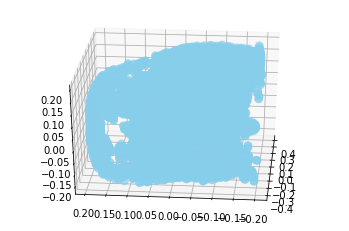

car_PoinNet.txt
                                          0
0       0.28664485,-0.065539785,-0.07031723
1         -0.39657518,0.18296574,0.13870493
2        -0.34396014,-0.1946984,-0.18821749
3       -0.119385585,-0.13867432,0.18083668
4       -0.12805487,0.070459075,-0.12554154
...                                     ...
16379  -0.37787312,-0.03099938,-0.049538128
16380   -0.33018106,0.030617915,0.017556094
16381    -0.22552302,-0.08665502,0.17724036
16382   -0.10090061,0.050842043,0.061850842
16383     -0.34590617,0.09914931,0.14060903

[16384 rows x 1 columns]


KeyError: ignored

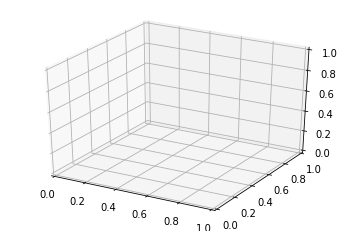

In [ ]:
# image visualization
import os
#dir_name = '/content/drive/MyDrive/shape-inversion-saved-results-chair/saved_results/CRN_chair'
dir_name = '/content/drive/MyDrive/ShapeNetResults6/benchmark/02958343/New'
count = 0 # huge number of files, included just to limit the count of images getting printed
for file in os.listdir(dir_name):
  print(file)
  file_name = dir_name+'/'+file
  print(create_df(file_name))
  create_img(create_df(file_name))
  count += 1
  if count > 20:
    break

In [ ]:
# Have open3d and matplotlib installed before it
def create_img(arr):
    df = pd.DataFrame(arr)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[0], df[1], df[2], c='skyblue', s=60)
    ax.view_init(30, 185)
    plt.show()
    fig.savefig("foo.pdf", bbox_inches='tight')

def plot_img():
  """
  list of imgs to plot with open3d
  """
  #for sample_img in imgs:
  for file in os.listdir('/content/drive/MyDrive/cars/cars'):
    file_name = '/content/drive/MyDrive/cars/cars'+'/'+file
    pcd = o3d.io.read_point_cloud(file_name)
    print(file_name)
    #print(np.asarray(pcd.points))
    # o3d.visualization.draw_geometries([pcd])
    create_img(np.asarray(pcd.points))

#imgs = ['/content/drive/MyDrive/downsampled/86c31c04c436f5932e877e82c90c24d.pcd']
#imgs = ['/content/drive/MyDrive/cars/cars']
plot_img()

/content/drive/MyDrive/cars/cars/frame_311_car_7.pcd


NameError: ignored

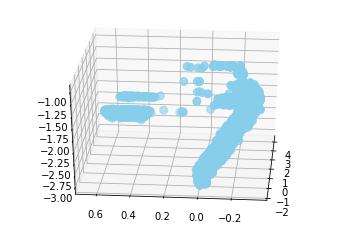

In [ ]:
def create_img(arr):
    df = pd.DataFrame(arr)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[0], df[1], df[2], c='skyblue', s=60)
    ax.view_init(30, 185)
    plt.show()

create_img(np.asarray(pcd.points))

In [ ]:
# downsampling given images

def downsample_img(file_names, to_downsample=899):
  """
  file_names: list of files
  downsampled file name would be extracted from the given file
  """
  downsample_folder = '/content/drive/MyDrive/downsampled/'
  for file_name in file_names:
    to_store = file_name.rsplit('/',1)[-1].split('.')[0]
    print(file_name, to_store)

    pcd = o3d.io.read_point_cloud(file_name)
    pcd_arr = np.asarray(pcd.points)
    temp = []
    for i, val in enumerate(pcd_arr, 1):
      # print(val, type(val))
      if i > to_downsample:
        break
      temp.append(val)
      i += 1

    pcd_new_arr = np.array(temp)
    print(type(pcd_new_arr), pcd_new_arr.shape)
    
    create_pcd = o3d.geometry.PointCloud()
    create_pcd.points = o3d.utility.Vector3dVector(pcd_new_arr)
    o3d.io.write_point_cloud(downsample_folder+to_store+'.pcd', create_pcd)

# file_names = ['/content/drive/MyDrive/shapenetDownsampled.txt']
to_downsample = 400
file_names = ['/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/complete/02958343/79763b6b5eb6cfe8c805dfe4ca9f2fdb.pcd']
downsample_img(file_names, to_downsample)

/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/complete/02958343/79763b6b5eb6cfe8c805dfe4ca9f2fdb.pcd 79763b6b5eb6cfe8c805dfe4ca9f2fdb
<class 'numpy.ndarray'> (400, 3)


In [ ]:
import open3d as o3d
import numpy as np

color_raw = o3d.io.read_image('/content/drive/MyDrive/KITTI/2011_09_26_drive_0013_sync_image_0000000035_image_03.png')
depth_raw = o3d.io.read_image('/content/drive/MyDrive/KITTI/2011_09_26_drive_0013_sync_groundtruth_depth_0000000035_image_03.png')
rgbd_image = o3d.geometry.RGBDImage.create_from_color_and_depth(
    color_raw, depth_raw)
print(rgbd_image)


RGBDImage of size 
Color image : 1216x352, with 1 channels.
Depth image : 1216x352, with 1 channels.
Use numpy.asarray to access buffer data.


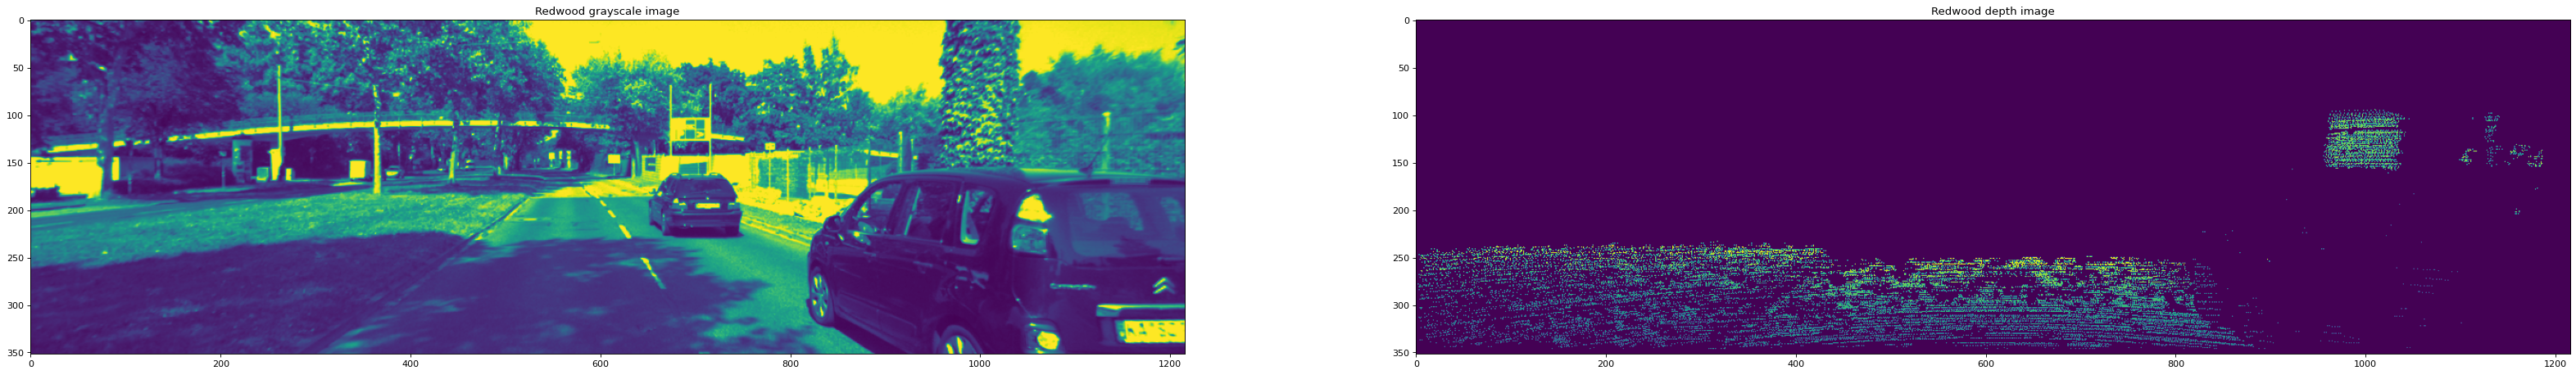

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(50, 50), dpi=80)
# np.asarray(rgbd_image)
# type(rgbd_image)
plt.subplot(1, 2, 1)
plt.title('Redwood grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('Redwood depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [ ]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.PrimeSenseDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
print(np.asarray(pcd.points))
# o3d.visualization.draw_geometries([pcd], zoom=0.5)

In [ ]:
create_pcd = o3d.geometry.PointCloud()
create_pcd.points = o3d.utility.Vector3dVector(np.asarray(pcd.points))
path_to_save = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/complete/02958343/test2.pcd'
o3d.io.write_point_cloud(path_to_save, create_pcd)

True

In [ ]:
import plotly.express as px
def create_img(arr, type='normal'):
    df = pd.DataFrame(arr)

    if type == 'normal':
      fig = plt.figure()
      ax = fig.add_subplot(111, projection='3d')
      ax.scatter(df[0], df[1], df[2], c='skyblue', s=60)
      ax.view_init(30, 185)
      plt.show()
    elif type == 'plotly':
      fig = px.scatter_3d(df, x=0, y=1, z=2)
      fig.show()




In [ ]:
# Create Boundary boxes
# SpareNet requires boundary boxes for given inputs for model training
# Below is boundary box calculation for Waymo Lidar dataset

import numpy as np
import open3d as o3d
#dir_name='/content/drive/MyDrive/KittiLidarObject/PCD'
dir_name='/content/drive/MyDrive/KITTI-Cars/complete'
for file in os.listdir(dir_name):
  if 'Car_' not in file:
    continue
  file_name = dir_name+'/'+file
  print(file_name)
  #create_img(create_df(file_name))
  print("Load a ply point cloud, print it, and render it")
  #pcd = o3d.io.read_point_cloud('/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/complete/02691156/1169d987dbbce76775f4ea0b85a53249.pcd')
  pcd = o3d.io.read_point_cloud(file_name)
  #print(pcd)
  pcd_points = np.asarray(pcd.points)
  #print(pcd_points)
  cordinates = [pcd_points.min(axis=0, keepdims=True), pcd_points.max(axis=0, keepdims=True)]
  #print(cordinates)
  arr = np.concatenate((pcd_points.min(axis=0, keepdims=True), pcd_points.max(axis=0, keepdims=True)))
  flat_list = arr.flatten()
  #flat_list = [item for sublist in arr for item in sublist]
  
  with open("/content/drive/MyDrive/bboxes/bboxes/"+file[0:len(file)-4]+".txt", "w") as f:
    # following order should be retained
    f.write(f'{flat_list[0]} {flat_list[1]} {flat_list[2]}\n')
    f.write(f'{flat_list[0]} {flat_list[1]} {flat_list[5]}\n')
    f.write(f'{flat_list[3]} {flat_list[1]} {flat_list[2]}\n')
    f.write(f'{flat_list[3]} {flat_list[1]} {flat_list[5]}\n')
    f.write(f'{flat_list[0]} {flat_list[4]} {flat_list[2]}\n')
    f.write(f'{flat_list[0]} {flat_list[4]} {flat_list[5]}\n')
    f.write(f'{flat_list[3]} {flat_list[4]} {flat_list[2]}\n')
    f.write(f'{flat_list[3]} {flat_list[4]} {flat_list[5]}\n')
    #f.write(flat_list[0]+" "+str(flat_list[1])+" "+str(flat_list[2])+"\n")
    #f.write(str(flat_list[0])+" "+str(flat_list[1])+" "+str(flat_list[5])+"\n")
    #f.write(str(flat_list[0])+" "+str(flat_list[4])+" "+str(flat_list[2])+"\n")
    #f.write(str(flat_list[0])+" "+str(flat_list[4])+" "+str(flat_list[5])+"\n")
    #f.write(str(flat_list[3])+" "+str(flat_list[4])+" "+str(flat_list[2])+"\n")
    #f.write(str(flat_list[3])+" "+str(flat_list[4])+" "+str(flat_list[5])+"\n")
    #f.write(str(flat_list[3])+" "+str(flat_list[1])+" "+str(flat_list[2])+"\n")
    #f.write(str(flat_list[3])+" "+str(flat_list[1])+" "+str(flat_list[5])+"\n")



/content/drive/MyDrive/KITTI-Cars/complete/000166_Car_0.pcd
Load a ply point cloud, print it, and render it
/content/drive/MyDrive/KITTI-Cars/complete/000157_Car_8.pcd
Load a ply point cloud, print it, and render it
/content/drive/MyDrive/KITTI-Cars/complete/000160_Car_0.pcd
Load a ply point cloud, print it, and render it
/content/drive/MyDrive/KITTI-Cars/complete/000165_Car_4.pcd
Load a ply point cloud, print it, and render it
/content/drive/MyDrive/KITTI-Cars/complete/000165_Car_1.pcd
Load a ply point cloud, print it, and render it
/content/drive/MyDrive/KITTI-Cars/complete/000164_Car_2.pcd
Load a ply point cloud, print it, and render it
/content/drive/MyDrive/KITTI-Cars/complete/000163_Car_2.pcd
Load a ply point cloud, print it, and render it
/content/drive/MyDrive/KITTI-Cars/complete/000157_Car_5.pcd
Load a ply point cloud, print it, and render it
/content/drive/MyDrive/KITTI-Cars/complete/000171_Car_2.pcd
Load a ply point cloud, print it, and render it
/content/drive/MyDrive/KITTI

In [ ]:

# dir_name = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/partial/02958343/79763b6b5eb6cfe8c805dfe4ca9f2fdb/'
#dir_name = '/content/drive/MyDrive/cars/cars/'

#kitti_img = '/content/drive/MyDrive/cars/cars/frame_77_car_0.pcd'

kitti_img = '/content/drive/MyDrive/cars/cars/frame_84_car_3.pcd'
shapenet_img = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/complete/02958343/16e54852d1d14c352c365ab601ec1d05.pcd'
img_list = [kitti_img]

# shapenet_centroid = np.ndarray([0.00810909, -0.00505888, -0.00032672])

shapenet_pcd = o3d.io.read_point_cloud(shapenet_img)
shapenet_pcd_pts = np.asarray(shapenet_pcd.points)
shapenet_centroid = shapenet_pcd_pts.mean(axis=0)

# to_store_pth = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/complete/test2/'
to_store_pth = '/content/drive/MyDrive/transformed_pcd/'


# for file in os.listdir(dir_name):
for file_name in img_list:
  pcd = o3d.io.read_point_cloud(file_name)

  print(np.asarray(pcd.points))
  # o3d.visualization.draw_geometries([pcd])
  create_img(np.asarray(pcd.points), 'plotly')

  temp = np.asarray(pcd.points)
  print(type(temp))
  kitti_centroid = temp.mean(axis=0)

  print(type(kitti_centroid))

  # find distance
  print(shapenet_centroid)
  print(kitti_centroid)
  dist = shapenet_centroid - kitti_centroid

  # changing the dimension
  new_pcd_pts = temp + dist
  # new_pcd_pts = temp.sum(dist)

  new_pcd_pts = new_pcd_pts * (1/20)
  print('-'*80)
  print(new_pcd_pts)

  # store new pcd
  create_pcd = o3d.geometry.PointCloud()
  create_pcd.points = o3d.utility.Vector3dVector(new_pcd_pts)
  o3d.io.write_point_cloud(to_store_pth+'kitti-transformed.pcd', create_pcd)

create_img(new_pcd_pts, 'plotly') # reshaped kitti
create_img(shapenet_pcd_pts, 'plotly')

[[ 1.16729736 -0.52721995  0.7294898 ]
 [ 1.30129719 -0.49421996  0.72648978]
 [ 0.84029675 -0.40322     0.73848981]
 ...
 [-1.24570274  0.84178001 -0.77251023]
 [-1.24170303  0.86177999 -0.77251023]
 [-1.23870277  0.89977998 -0.77351016]]


TypeError: ignored

[Open3D WARNING] Read PCD failed: unable to open file: /content/drive/MyDrive/cars/cars/frame_84_car_3.pcd
[]


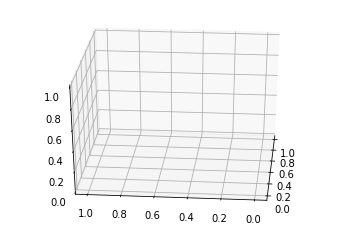

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[ 0.00810909 -0.00505888 -0.00032672]
[nan nan nan]
--------------------------------------------------------------------------------
[]
[Open3D WARNING] Write PCD failed: unable to generate header.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:163: RuntimeWarning:

invalid value encountered in true_divide



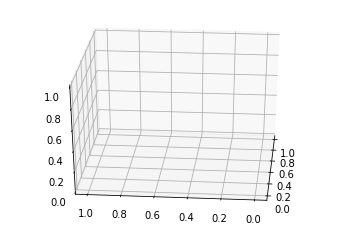

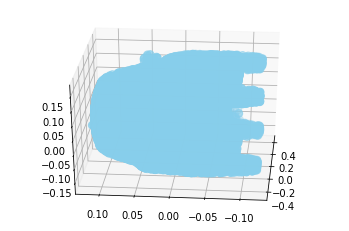

In [ ]:
kitti_img = '/content/drive/MyDrive/cars/cars/frame_84_car_3.pcd'
#kitti_img = '/content/drive/MyDrive/KittiLidarObject/pointcloud.pcd'
#shapenet_img = '/content/drive/MyDrive/KittiLidarObject/pointcloud.pcd'
shapenet_img = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/complete/02958343/16e54852d1d14c352c365ab601ec1d05.pcd'
img_list = [kitti_img]

# shapenet_centroid = np.ndarray([0.00810909, -0.00505888, -0.00032672])

shapenet_pcd = o3d.io.read_point_cloud(shapenet_img)
shapenet_pcd_pts = np.asarray(shapenet_pcd.points)
shapenet_centroid = shapenet_pcd_pts.mean(axis=0)

# to_store_pth = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/complete/test2/'
to_store_pth = '/content/drive/MyDrive/transformed_pcd/'


# for file in os.listdir(dir_name):
for file_name in img_list:
  pcd = o3d.io.read_point_cloud(file_name)

  print(np.asarray(pcd.points))
  # o3d.visualization.draw_geometries([pcd])
  create_img(np.asarray(pcd.points))

  temp = np.asarray(pcd.points)
  print(type(temp))
  kitti_centroid = temp.mean(axis=0)

  print(type(kitti_centroid))

  # find distance
  print(shapenet_centroid)
  print(kitti_centroid)
  dist = shapenet_centroid - kitti_centroid

  # changing the dimension
  new_pcd_pts = temp + dist
  # new_pcd_pts = temp.sum(dist)

  new_pcd_pts = new_pcd_pts * (1/20)
  print('-'*80)
  print(new_pcd_pts)

  # store new pcd
  create_pcd = o3d.geometry.PointCloud()
  create_pcd.points = o3d.utility.Vector3dVector(new_pcd_pts)
  o3d.io.write_point_cloud(to_store_pth+'kitti-transformed.pcd', create_pcd)

create_img(new_pcd_pts) # reshaped kitti
create_img(shapenet_pcd_pts)

In [ ]:
def copy_pcd_to_shapenet():
  pth1 = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/complete/test2/'
  pth2 = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/partial/'
  

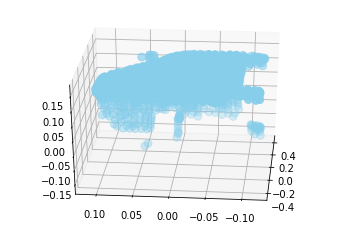

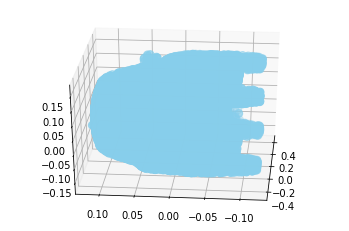

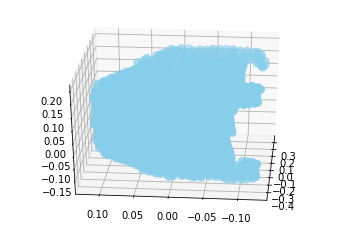

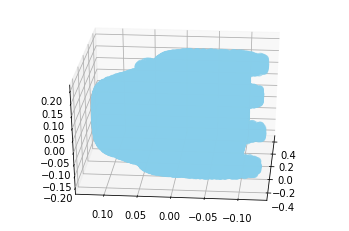

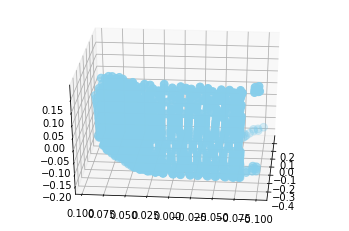

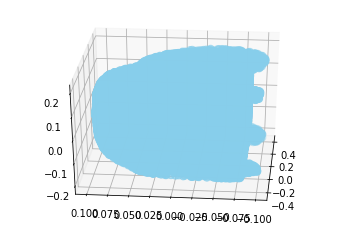

In [ ]:
kitti_img = '/content/drive/MyDrive/cars/cars/frame_84_car_3.pcd'
shapenet_img2 = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/complete/02958343/16e54852d1d14c352c365ab601ec1d05.pcd'
shapenet_img1 = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/partial/02958343/16e54852d1d14c352c365ab601ec1d05/00.pcd'

shapenet_img4 = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/complete/02958343/1b23106e1c447efc36c8c5d8a85eb4f9.pcd'
shapenet_img3 = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/partial/02958343/1b23106e1c447efc36c8c5d8a85eb4f9/00.pcd'

#1ebef900d0b077a0909e2381adbddb4b
shapenet_img5 = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/partial/02958343/1ebef900d0b077a0909e2381adbddb4b/00.pcd'
shapenet_img6 = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/complete/02958343/1ebef900d0b077a0909e2381adbddb4b.pcd'
img_list = [shapenet_img1, shapenet_img2, shapenet_img3, shapenet_img4, shapenet_img5, shapenet_img6]

# for file in os.listdir(dir_name):
for file_name in img_list:
  pcd = o3d.io.read_point_cloud(file_name)

  # print(np.asarray(pcd.points))
  # o3d.visualization.draw_geometries([pcd])
  create_img(np.asarray(pcd.points))

In [ ]:
def create_img(arr):
    df = pd.DataFrame(arr)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df[0], df[1], df[2], c='skyblue', s=60)
    ax.view_init(30, 185)
    plt.show()

import plotly.graph_objects as go
import plotly.express as px

import pandas as pd

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')

shapenet_img2 = '/content/drive/MyDrive/KITTI-Cars/complete/000154_Car_6.pcd'
#shapenet_img1 = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/partial/02958343/4cabd6d81c0a9e8c6436916a86a90ed7/00.pcd'
shapenet_img1 = '/content/drive/MyDrive/KittiLidarObject/pointcloud.pcd'
shapenet_img4 = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/complete/02958343/4e3a0f69a63ee72426d1f3c517cdece5.pcd'
shapenet_img3 = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/partial/02958343/4e3a0f69a63ee72426d1f3c517cdece5/00.pcd'

#1ebef900d0b077a0909e2381adbddb4b
shapenet_img5 = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/partial/02958343/4ffcd9ac4e9e275b4a09828e3e3dc0c6/00.pcd'
shapenet_img6 = '/content/drive/MyDrive/ShapeNetCompletion/ShapeNetCompletion/test/complete/02958343/4ffcd9ac4e9e275b4a09828e3e3dc0c6.pcd'
#img_list = [shapenet_img1, shapenet_img2, shapenet_img3, shapenet_img4, shapenet_img5, shapenet_img6]
img_list = [shapenet_img2]
# for file in os.listdir(dir_name):
dir_name = '/content/drive/MyDrive/KITTI-Cars/complete/'
for file_name in os.listdir(dir_name):
  
  if 'Car_' not in file_name:
    continue
  print(file_name)
  file_name = os.path.join(dir_name, file_name)
  
  pcd = o3d.io.read_point_cloud(file_name)

  # print(np.asarray(pcd.points))
  # o3d.visualization.draw_geometries([pcd])
  create_img(np.asarray(pcd.points))

  # df = pd.DataFrame(pcd.points)


  # fig = px.scatter_3d(df, x=0, y=1, z=2)

  # fig.show()
  print('-'*20)
  

Output hidden; open in https://colab.research.google.com to view.